# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
from os import system

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO

#import pydotplus
#import graphviz

from statistics import median,mean

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score, precision_score,recall_score

# Read Data

In [2]:
address = 'C:/Users/Bhupendra/Desktop/AIML/Project3-Ensemble_Technique/bank-full.csv'

data =pd.read_csv(address)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# EDA 

In [4]:
data.shape

(45211, 17)

In [5]:
# Data Type of Each Features

data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

10 Features are object type and 7 are numbers

As per data the data 10 features are of category (object) so those need to be converted to category type

In [6]:
data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


Convert Strings to Category

In [7]:
data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']]=data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [8]:
data.dtypes.to_frame('Datatypes of Attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of Attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


Check the presence of missing values

In [9]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [10]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [11]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [12]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [13]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [14]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [15]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# Outliers are observed in above data as the normal distribution curve is -3SD to +3SD whereas above in age STD is 10 which means max value would be 40+30= 70 which is less than max valueof 95

outliers are present in age, balance,duration,campaign,pdays,previous

# Distribution of Numerical Columns (to Check Skewness etc)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
<ipython-input-17-85716cfe9c8e>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


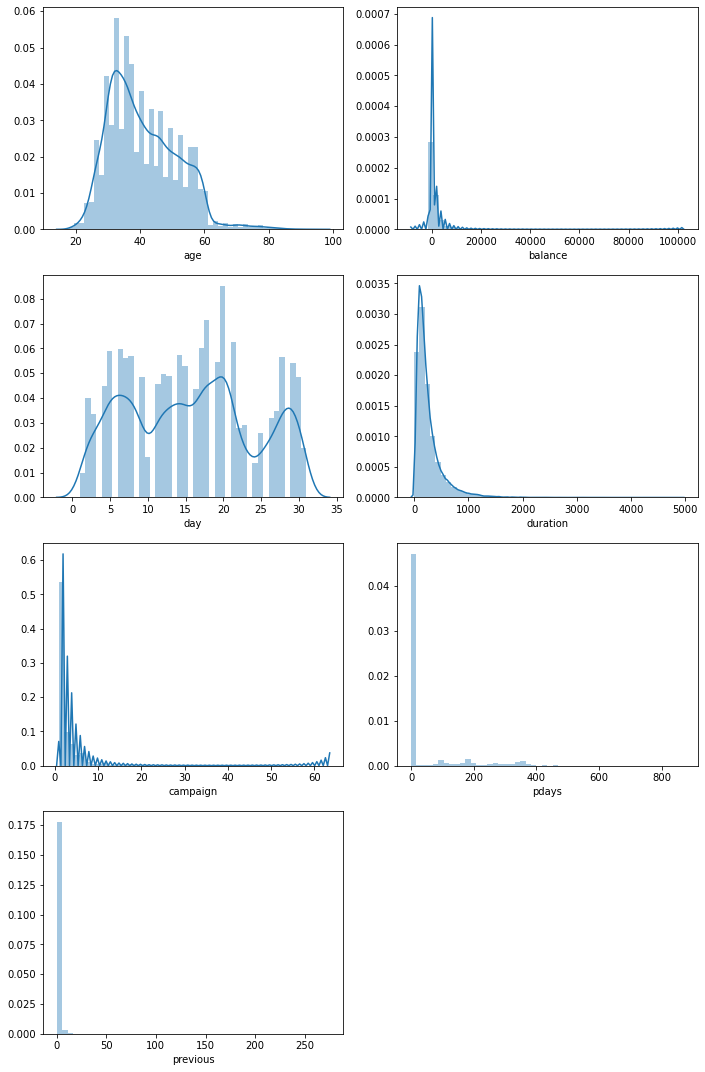

In [17]:
fig, axe =plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten()
sns.distplot(data['age'],ax=axe[0])
sns.distplot(data['balance'],ax=axe[1])
sns.distplot(data['day'],ax=axe[2])
sns.distplot(data['duration'],ax=axe[3])
sns.distplot(data['campaign'],ax=axe[4])
sns.distplot(data['pdays'],ax=axe[5])
sns.distplot(data['previous'],ax=axe[6])

fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

# Distribution of Categorical Feature. It cant be distribution plot so need the count plot to be created

<ipython-input-18-7afbe029e9d6>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


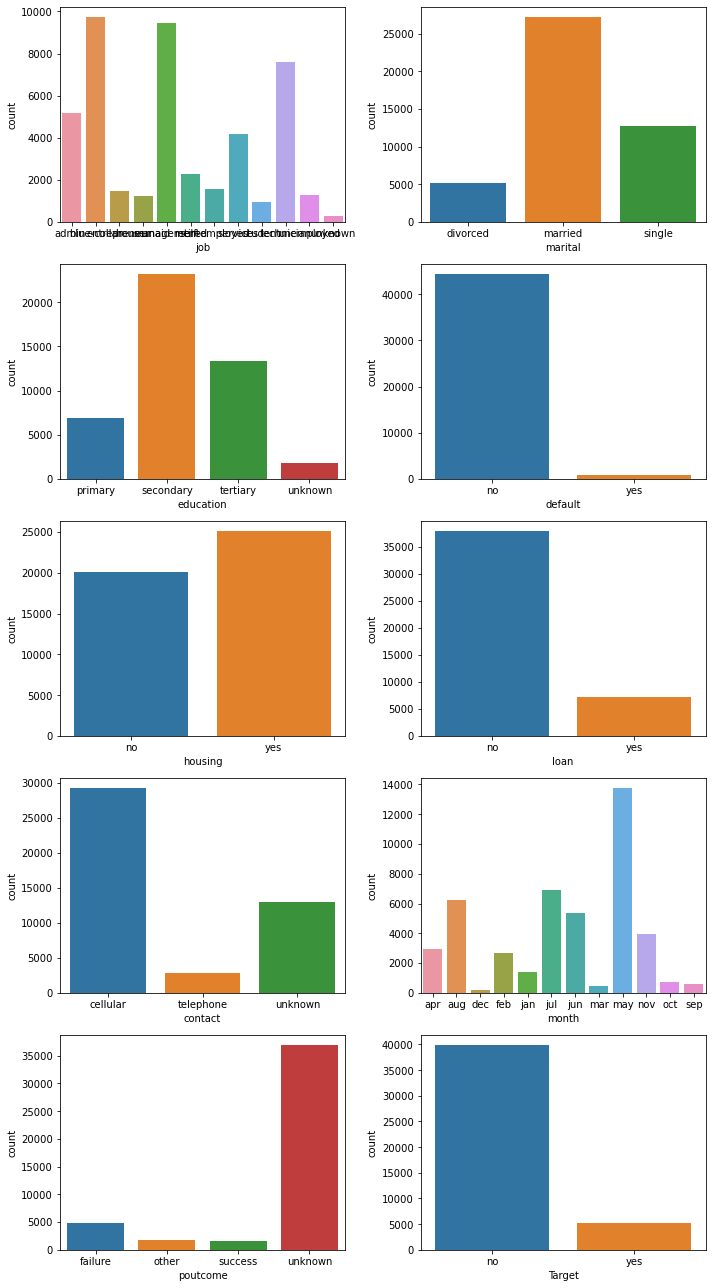

In [18]:
fig, axe =plt.subplots(nrows=5,ncols=2,figsize=(10,18))
axe=axe.flatten()

plot=sns.countplot(x=data['job'],data=data,ax=axe[0])
#plt.setp(plt.get_xticklabel(),rotation=90)

sns.countplot(x=data['marital'],data=data,ax=axe[1])
sns.countplot(x=data['education'],data=data,ax=axe[2])
sns.countplot(x=data['default'],data=data,ax=axe[3])
sns.countplot(x=data['housing'],data=data,ax=axe[4])
sns.countplot(x=data['loan'],data=data,ax=axe[5])
sns.countplot(x=data['contact'],data=data,ax=axe[6])
sns.countplot(x=data['month'],data=data,ax=axe[7])
sns.countplot(x=data['poutcome'],data=data,ax=axe[8])
sns.countplot(x=data['Target'],data=data,ax=axe[9])

fig.tight_layout()
fig.show()

Above shows that the categorical data is imbalanced

# Inferences from the countplot of the categorical features

More than 90% customers have 'No' Default Credit

88% of customers have not subscribed for Term Deposit

Most Customers have been contacted in May Month

Most of the customers have been contacted by Cellular network

Number of Customers who have housing loan is more than the number of customers who don't have housing loan

Around 6% customers have credit in default

# Measure of Skewness of Numerical Features

In [19]:
data.skew().to_frame('Skewness Measure')

,Skewness Measure
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


# Checking the Presence of Outliers

<ipython-input-20-473b00e16750>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


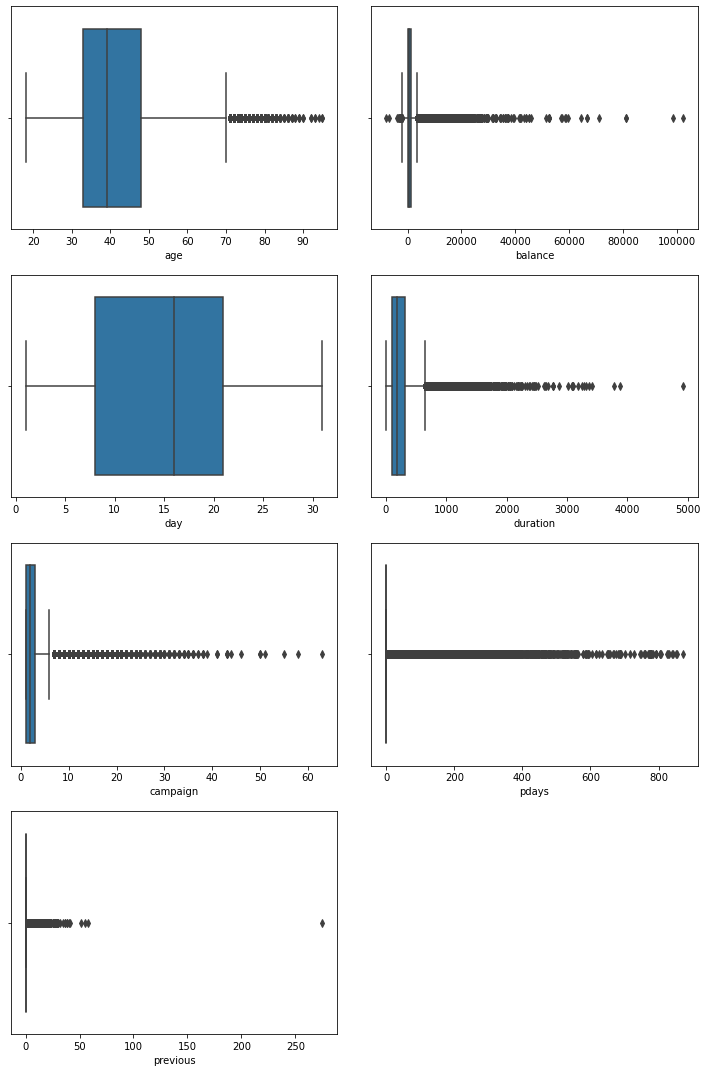

In [20]:
fig, axe =plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten()
sns.boxplot(x='age',data=data,ax=axe[0])
sns.boxplot(x='balance',data=data,ax=axe[1])
sns.boxplot(x='day',data=data,ax=axe[2])
sns.boxplot(x='duration',data=data,ax=axe[3])
sns.boxplot(x='campaign',data=data,ax=axe[4])
sns.boxplot(x='pdays',data=data,ax=axe[5])
sns.boxplot(x='previous',data=data,ax=axe[6])

fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

Except Day there are outliers in all numerical features

In [21]:
data['Target'].value_counts().to_frame('Target Feature Distribution')

,Target Feature Distribution
no,39922
yes,5289


Imbalanced Target Values

# Encode Category for further analysis (String to Numerical)

In [22]:
data.dtypes.to_frame('Datatypes of Attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of Attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


In [23]:
df=data.copy()
encoder=LabelEncoder()

df['default']=encoder.fit_transform(df['default']).astype(int)
df['marital']=encoder.fit_transform(df['marital']).astype(int)
df['education']=encoder.fit_transform(df['education']).astype(int)
df['housing']=encoder.fit_transform(df['housing']).astype(int)
df['loan']=encoder.fit_transform(df['loan']).astype(int)
df['month']=encoder.fit_transform(df['month']).astype(int)
df['poutcome']=encoder.fit_transform(df['poutcome']).astype(int)
df['Target']=encoder.fit_transform(df['Target']).astype(int)

df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,1,2,1,1,2
education,2,1,1,3,3
default,0,0,0,0,0
balance,2143,29,2,1506,1
housing,1,1,1,1,0
loan,0,0,1,0,0
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int32   
 3   education  45211 non-null  int32   
 4   default    45211 non-null  int32   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int32   
 7   loan       45211 non-null  int32   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int32   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int32   
 16  Target     45211 non-null  int32   
dtypes: category(2), int32(8), int64(7)
memory usage: 3.9 MB


In [25]:
df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']]=df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


# Handling Outliers with mean replacement

In [27]:
meanbal=float(df['balance'].mean())
df['balance']=np.where(df['balance']>np.percentile(df['balance'],75),meanbal,df['balance']) # Outside 3rd Quartile of data

meandur=float(df['duration'].mean())
df['duration']=np.where(df['duration']>np.percentile(df['duration'],75),meandur,df['duration']) # Outside 3rd Quartile of data

meancamp=float(df['campaign'].mean())
df['campaign']=np.where(df['campaign']>np.percentile(df['campaign'],75),meancamp,df['campaign']) # Outside 3rd Quartile of data

meanpd=float(df['pdays'].mean())
df['pdays']=np.where(df['pdays']>np.percentile(df['pdays'],75),meanpd,df['pdays']) # Outside 3rd Quartile of data

meanpr=float(df['previous'].mean())
df['previous']=np.where(df['previous']>np.percentile(df['previous'],75),meanpr,df['previous']) # Outside 3rd Quartile of data

# After removing outliers

<ipython-input-28-78c1bc2eb66b>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


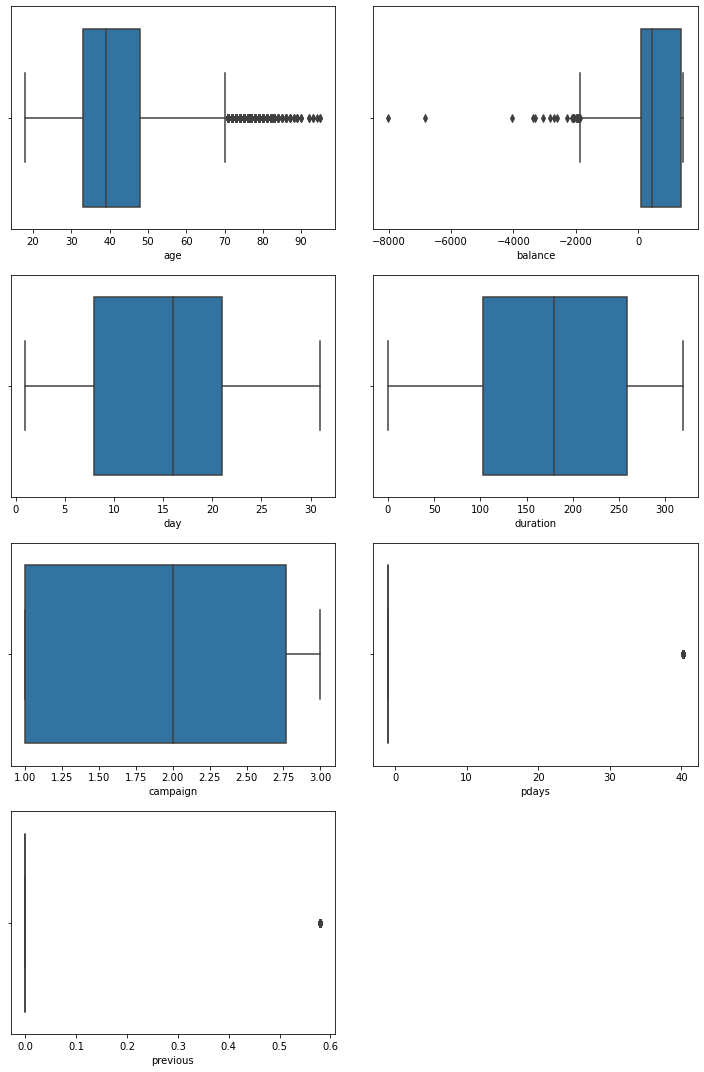

In [28]:
fig, axe =plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten()
sns.boxplot(x='age',data=df,ax=axe[0])
sns.boxplot(x='balance',data=df,ax=axe[1])
sns.boxplot(x='day',data=df,ax=axe[2])
sns.boxplot(x='duration',data=df,ax=axe[3])
sns.boxplot(x='campaign',data=df,ax=axe[4])
sns.boxplot(x='pdays',data=df,ax=axe[5])
sns.boxplot(x='previous',data=df,ax=axe[6])

fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

# Correlation Plot of all features

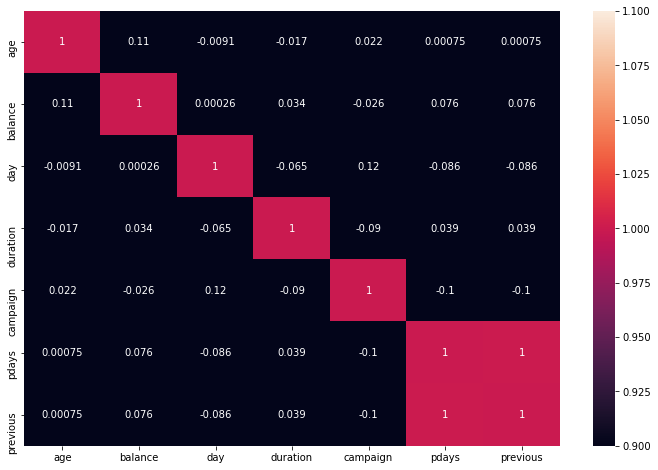

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=1)

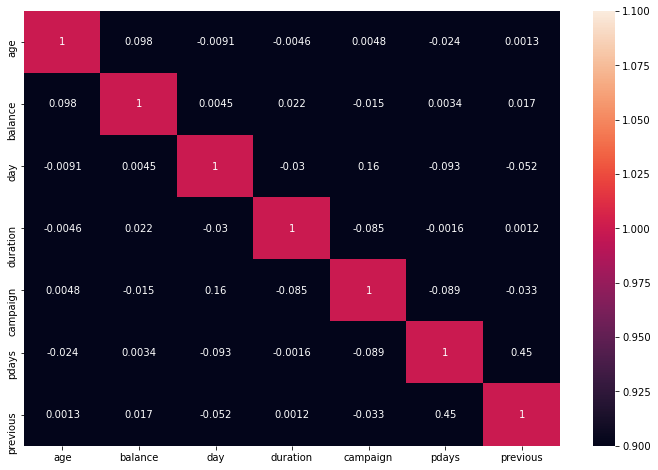

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=1)

In [33]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,1362.272058,1,0,unknown,5,8,261.0,1.0,-1.0,0.0,3,0


In [34]:
df['education'].value_counts()

1    23202
2    13301
0     6851
3     1857
Name: education, dtype: int64

# All features which are not relevant to the problem are to be dropped

In [35]:
df2= df.drop(['job','education','contact','duration','pdays','day','month'],axis=1)
df2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


# Pairplot of the features, to check if anymore redundant features

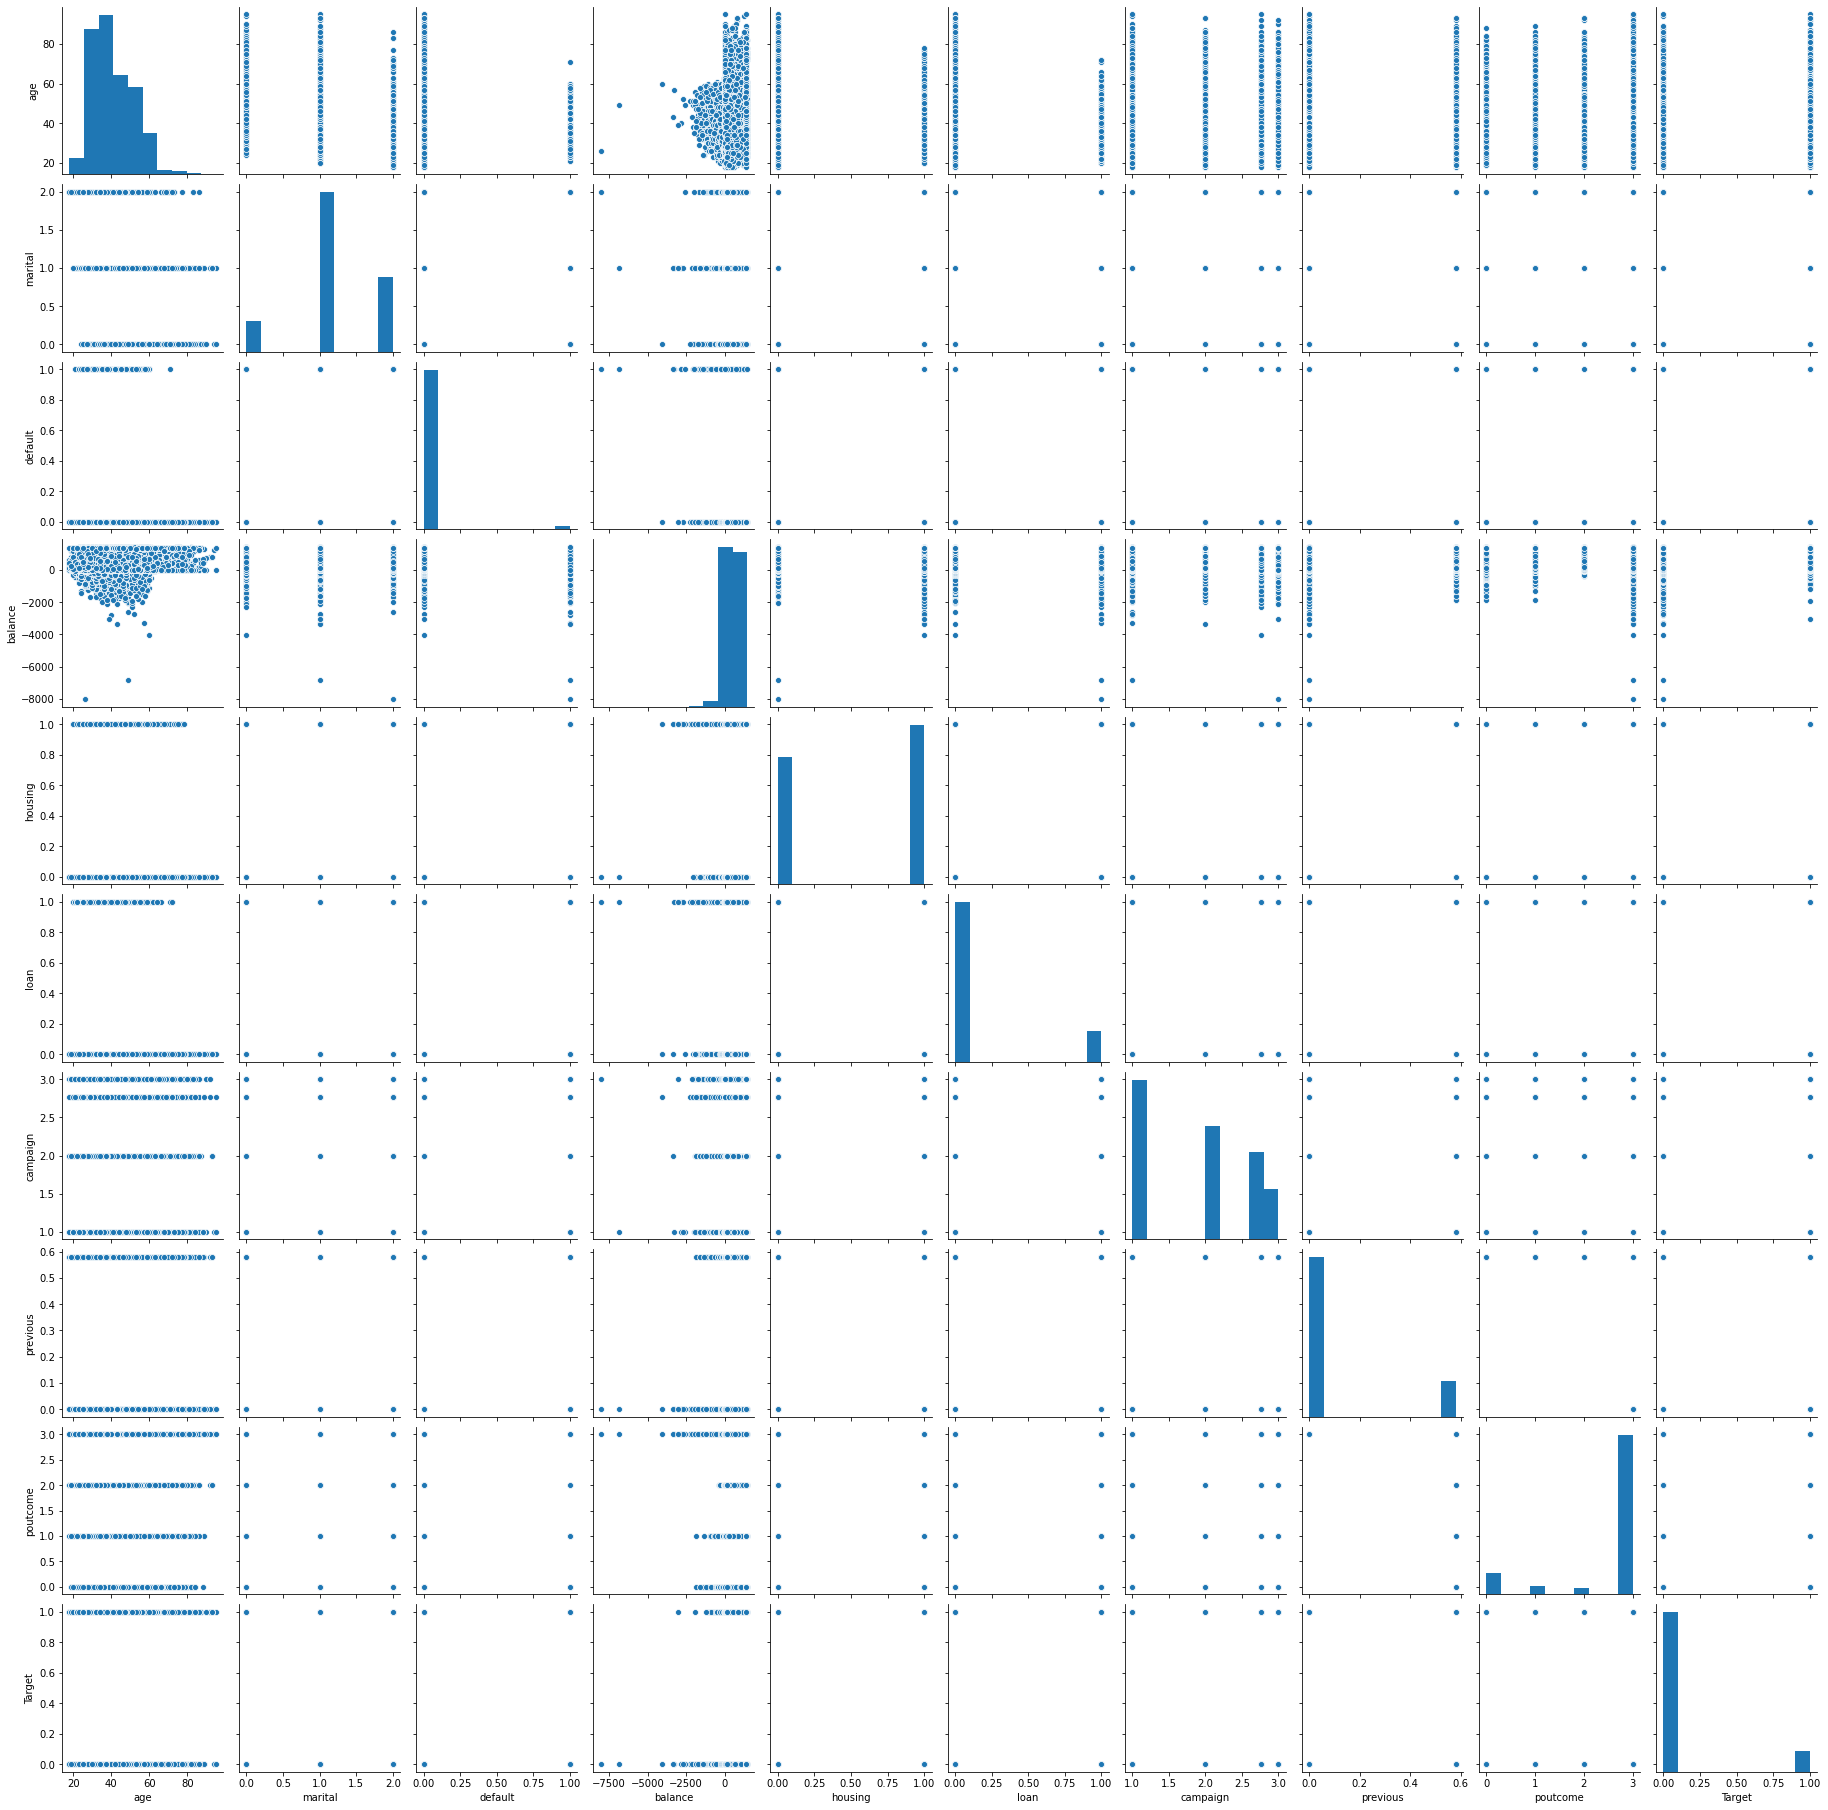

In [36]:
sns.pairplot(df2)

# Split data for Training and Testing in 70:30

In [37]:
x=df2.drop('Target',axis=1)
y=df2['Target']

In [38]:
x.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome
0,58,1,0,1362.272058,1,0,1.0,0.0,3
1,44,2,0,29.000000,1,0,1.0,0.0,3
2,33,1,0,2.000000,1,1,1.0,0.0,3
3,47,1,0,1362.272058,1,0,1.0,0.0,3
4,33,2,0,1.000000,0,0,1.0,0.0,3


In [39]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: category
Categories (2, int64): [0, 1]

In [40]:
xtrain, xtest, ytrain, ytest =train_test_split(x,y,test_size=0.3,random_state=2)

# Scale the data as the data spread is from 0 to 1000s. This is done for Independent Variable only

In [41]:
scaler =StandardScaler()
xtrain_scale=scaler.fit_transform(xtrain)
xtest_scale=scaler.fit_transform(xtest)

# Build the Model

# Logistic Regression Model

In [44]:
logic_r=LogisticRegression(solver='liblinear')
logic_r.fit(xtrain_scale,ytrain)
y_pred=logic_r.predict(xtest_scale)
LR_accuracy = accuracy_score(ytest,y_pred)
print('\nConfusion Matrix\n\n', confusion_matrix(ytest, y_pred))
print('\nAccuracy Score\n\n',LR_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,y_pred))


Confusion Matrix

 [[11892   107]
 [ 1318   247]]

Accuracy Score

 89.49424948392804

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.70      0.16      0.26      1565

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



# Naive Bayes

In [45]:
NB= GaussianNB()
NB.fit(xtrain_scale,ytrain)
y_predi=NB.predict(xtest_scale)
NB_accuracy = accuracy_score(ytest,y_predi)
print('\nConfusion Matrix\n\n', confusion_matrix(ytest, y_predi))
print('\nAccuracy Score\n\n',NB_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,y_predi))


Confusion Matrix

 [[10667  1332]
 [ 1055   510]]

Accuracy Score

 82.40194632851666

Classification Report

               precision    recall  f1-score   support

           0       0.91      0.89      0.90     11999
           1       0.28      0.33      0.30      1565

    accuracy                           0.82     13564
   macro avg       0.59      0.61      0.60     13564
weighted avg       0.84      0.82      0.83     13564



# KNN Model

In [46]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain_scale,ytrain)
y_predk=knn.predict(xtest_scale)
knn_accuracy = accuracy_score(ytest,y_predk)
print('\nConfusion Matrix\n\n', confusion_matrix(ytest, y_predk))
print('\nAccuracy Score\n\n',knn_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,y_predk))


Confusion Matrix

 [[11465   534]
 [ 1236   329]]

Accuracy Score

 86.95075199056326

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.38      0.21      0.27      1565

    accuracy                           0.87     13564
   macro avg       0.64      0.58      0.60     13564
weighted avg       0.84      0.87      0.85     13564



# SVC Model

In [47]:
svc= SVC()
svc.fit(xtrain_scale,ytrain)
y_preds=svc.predict(xtest_scale)
SVC_accuracy = accuracy_score(ytest,y_preds)
print('\nConfusion Matrix\n\n', confusion_matrix(ytest, y_preds))
print('\nAccuracy Score\n\n',SVC_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,y_preds))


Confusion Matrix

 [[11856   143]
 [ 1287   278]]

Accuracy Score

 89.45738720141551

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.66      0.18      0.28      1565

    accuracy                           0.89     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564



# Decision Tree

In [48]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=1)
dtree.fit(xtrain_scale,ytrain)
y_preddt=dtree.predict(xtest_scale)
DT_accuracy = accuracy_score(ytest,y_preddt)
print('\nConfusion Matrix\n\n', confusion_matrix(ytest, y_preddt))
print('\nAccuracy Score\n\n',DT_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,y_preddt))


Confusion Matrix

 [[10820  1179]
 [ 1184   381]]

Accuracy Score

 82.57888528457681

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.90      0.90     11999
           1       0.24      0.24      0.24      1565

    accuracy                           0.83     13564
   macro avg       0.57      0.57      0.57     13564
weighted avg       0.83      0.83      0.83     13564



# Feature Importance Test for Decision Tree

# This code is not working, would be taken in Random Forest

In [49]:
xvar= df2.drop('Target',axis=1)

In [51]:
feature_cols=xvar.columns
feat_importance =dtree.compute_feature_importances_(normalize=False)
feat_imp_dict=dict(zip(feature_cols,dtree.feature_importances_))
feat_imp=pd.DataFrame.from_dict(feat_imp_dict,orient='index')
deat_imp.sort_values(by=0,ascending=False)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'compute_feature_importances_'

# Bagging Ensemble Model

In [52]:
bagc=BaggingClassifier(base_estimator=dtree,n_estimators=500,random_state=1)
bagc.fit(xtrain_scale,ytrain)
bag_pred=bagc.predict(xtest_scale)
Bag_accuracy = accuracy_score(ytest,bag_pred)
print('\nConfusion Matrix\n\n', confusion_matrix(ytest, bag_pred))
print('\nAccuracy Score\n\n',Bag_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,bag_pred))


Confusion Matrix

 [[11547   452]
 [ 1230   335]]

Accuracy Score

 87.59952816278384

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.43      0.21      0.28      1565

    accuracy                           0.88     13564
   macro avg       0.66      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



# Adaptive Boosting Ensemble Model

In [53]:
adab= AdaBoostClassifier(n_estimators=50,random_state=1)
adab.fit(xtrain_scale,ytrain)
adab_pred=adab.predict(xtest_scale)
ADAB_accuracy = accuracy_score(ytest,adab_pred)
print('\nConfusion Matrix\n\n', confusion_matrix(ytest, adab_pred))
print('\nAccuracy Score\n\n',ADAB_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,adab_pred))


Confusion Matrix

 [[11885   114]
 [ 1324   241]]

Accuracy Score

 89.39840754939546

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.68      0.15      0.25      1565

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



# Random Forest Ensemble Model

In [55]:
randf=RandomForestClassifier(n_estimators=100,random_state=2,max_features=3)
randf.fit(xtrain_scale,ytrain)
randf_pred=randf.predict(xtest_scale)
RANDF_accuracy = accuracy_score(ytest,randf_pred)
print('\nConfusion Matrix\n\n', confusion_matrix(ytest, randf_pred))
print('\nAccuracy Score\n\n',RANDF_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,randf_pred))


Confusion Matrix

 [[11537   462]
 [ 1233   332]]

Accuracy Score

 87.50368622825125

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.42      0.21      0.28      1565

    accuracy                           0.88     13564
   macro avg       0.66      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



# Gradient Boost Model

In [56]:
randg=GradientBoostingClassifier(n_estimators=100,random_state=2)
randg.fit(xtrain_scale,ytrain)
randg_pred=randg.predict(xtest_scale)
GB_accuracy = accuracy_score(ytest,randg_pred)
print('\nConfusion Matrix\n\n', confusion_matrix(ytest, randg_pred))
print('\nAccuracy Score\n\n',GB_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,randg_pred))


Confusion Matrix

 [[11901    98]
 [ 1331   234]]

Accuracy Score

 89.46475965791801

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.70      0.15      0.25      1565

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



# Model Accuracy Scores

In [61]:
scores=[('Logistic Regression',LR_accuracy),('Naive Bayes',NB_accuracy),('KNN Accuracy',knn_accuracy),('SVC Accuracy',SVC_accuracy),('Decision Tree Accuracy',DT_accuracy),('Bagging Accuracy',Bag_accuracy),('Gradinet Boost Accuracy',GB_accuracy),('ADA Boost Accuracy',ADAB_accuracy),('Random Forest Accuracy',RANDF_accuracy)]
scores=pd.DataFrame(scores,columns=['Model','Accuracy_Score'])
print('\033[1m'' Current Scores with Outliers Replaced with mean:]')
scores.sort_values(by='Accuracy_Score',ascending=False)

 Current Scores with Outliers Replaced with mean:]


,Model,Accuracy_Score
0,Logistic Regression,0.894942
6,Gradinet Boost Accuracy,0.894648
3,SVC Accuracy,0.894574
7,ADA Boost Accuracy,0.893984
5,Bagging Accuracy,0.875995
8,Random Forest Accuracy,0.875037
2,KNN Accuracy,0.869508
4,Decision Tree Accuracy,0.825789
1,Naive Bayes,0.824019


# Data Set is Imbalanced

# SVC performed better than Naive Bayes as 